In [1]:
from interClusLib.IntervalData import IntervalData
from interClusLib.metric import *
from interClusLib.clustering import IntervalKMeans, IntervalAgglomerativeClustering
from interClusLib.visualization.HeatMap import HeatMap
from interClusLib.visualization import Interval2d, Interval3d ,IntervalParallelCoordinates ,IntervalRadarChart, Dendrogram

random_data = IntervalData.make_interval_blobs(n_samples=1000, n_clusters=3, n_dims = 4)
print("\n Random Interval Data:")
print(random_data.data)
random_data.summary()


 Random Interval Data:
     Feature_1_lower  Feature_1_upper  Feature_2_lower  Feature_2_upper  \
0          -7.236566        -5.199847         0.798585         4.107488   
1          -7.640209        -7.540209         7.515211         7.615211   
2          -5.901954        -2.066174        -6.847851        -3.140644   
3          -8.096372        -6.719108        -0.889987         4.034459   
4          -9.412177        -9.312177        -0.972011         3.335262   
..               ...              ...              ...              ...   
995        -5.472677        -5.372677         6.066432         6.166432   
996        -7.229978        -6.208519         5.735659         7.251050   
997        -9.593809        -6.927873        -0.762475         2.966765   
998        -8.514514        -6.603300        -1.743100         2.374248   
999        -6.494746        -1.621310        -8.169106        -4.828469   

     Feature_3_lower  Feature_3_upper  Feature_4_lower  Feature_4_upper  
0

In [2]:

hmodel = IntervalAgglomerativeClustering(n_clusters=3, linkage='ward')
hmodel.fit(random_data.get_intervals())

print(hmodel.labels_)

dendrogram_data = hmodel.get_dendrogram_data()

print(dendrogram_data)

# 绘制基本树形图

[2 1 0 2 2 2 0 1 2 1 0 2 1 2 1 2 1 1 2 2 0 0 2 1 1 0 2 2 0 2 0 2 0 2 0 2 1
 0 1 0 0 2 0 2 0 0 2 1 2 0 2 0 1 2 2 2 0 2 1 2 2 0 0 2 1 0 1 0 0 1 1 1 0 1
 0 2 1 0 0 1 1 1 2 2 1 0 1 1 0 0 1 1 2 1 0 2 1 1 2 2 2 0 1 1 2 1 0 1 1 2 0
 2 2 2 0 0 1 1 0 0 2 0 2 2 2 2 0 1 0 2 1 0 0 0 1 1 0 1 1 1 1 1 2 1 1 0 0 0
 1 0 1 2 0 0 2 0 2 0 2 2 1 1 0 2 1 1 2 2 2 0 0 2 1 0 2 2 1 1 1 0 0 0 2 1 0
 2 0 1 2 1 0 2 0 2 1 2 0 0 0 1 2 0 1 0 0 2 1 2 2 1 2 1 1 0 2 1 2 2 0 2 2 0
 0 2 1 2 2 0 0 0 2 1 2 2 2 1 1 2 2 0 1 1 2 1 2 2 0 1 2 0 1 1 1 2 0 2 1 1 1
 2 0 0 0 0 0 0 0 0 1 0 2 1 1 2 1 0 0 2 2 2 0 2 2 0 0 0 0 2 1 2 2 0 2 2 1 1
 1 0 2 1 1 0 0 0 1 1 0 0 2 0 1 1 2 0 2 1 2 1 2 1 1 1 2 1 1 0 1 0 1 2 0 0 2
 0 0 0 0 1 1 1 0 1 1 2 2 2 2 2 2 0 0 0 0 1 2 2 0 2 0 1 0 1 1 1 2 1 2 2 1 0
 2 0 1 0 1 0 0 1 0 1 0 2 2 2 2 2 2 2 0 0 1 1 0 0 1 0 1 1 2 2 2 2 1 2 2 0 2
 2 1 0 1 1 1 1 0 1 2 1 0 1 2 1 1 0 0 0 1 0 1 2 2 0 2 1 0 2 1 2 1 1 1 1 0 0
 1 1 1 2 2 0 1 0 1 1 2 2 2 2 2 2 0 1 1 2 2 0 2 2 2 0 0 0 0 1 0 0 1 0 0 0 0
 2 1 1 0 1 1 2 1 2 0 0 0 

Requested clusters: 5, Actual clusters: 5


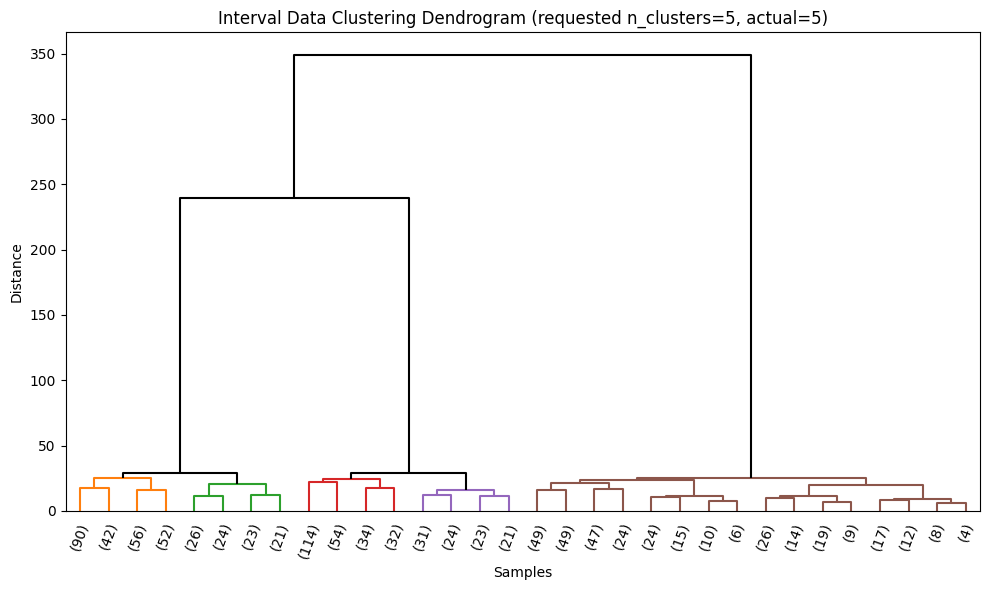

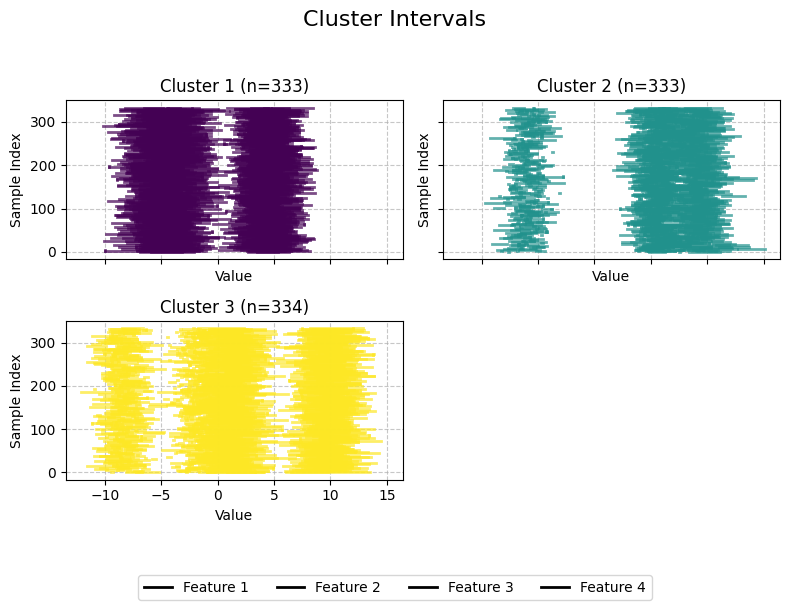

In [3]:
fig, ax, dendro_output = Dendrogram.visualize(
    dendrogram_data=dendrogram_data,
    p=4,
    n_clusters=5,
    title="Interval Data Clustering Dendrogram",
    show_distances= False,
    count_sort= 'descending',
    leaf_rotation=70.,
    truncate_mode='level',
    orientation='top',
    show_leaf_counts=True,
    figsize=(10,6)
)

fig, ax = Dendrogram.visualize_intervals(intervals = random_data.get_intervals() , labels = hmodel.labels_)

(<Figure size 1200x800 with 1 Axes>,
 <Axes: title={'center': 'Parallel Coordinates'}>)

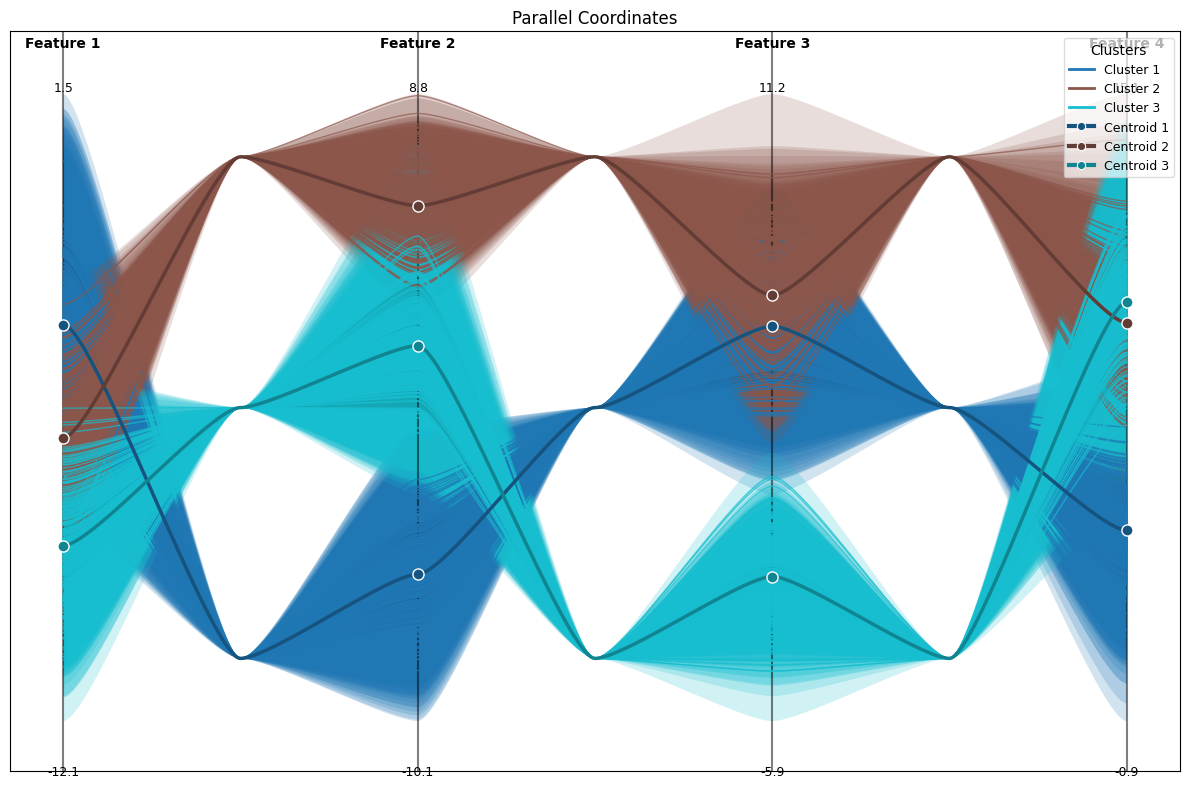

In [4]:

IntervalParallelCoordinates.visualize(intervals = random_data.get_intervals(), 
                                      feature_names= None, 
                                      centroids= hmodel.centroids_,
                                      labels=hmodel.labels_,
                                      alpha=1/6,
                                      beta = 1,
                                      use_bundling= True)


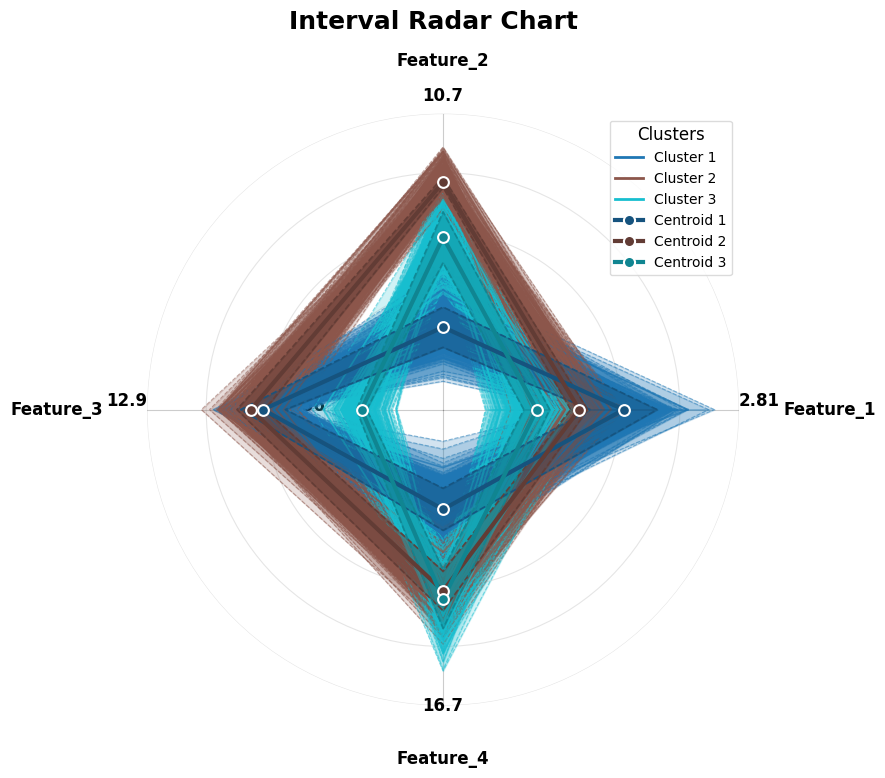

In [5]:
fig, ax = IntervalRadarChart.visualize(
    intervals=random_data.get_intervals(), 
    centroids=hmodel.centroids_,
    labels=hmodel.labels_,
    title="Interval Radar Chart",
    max_samples_per_cluster=50,
)

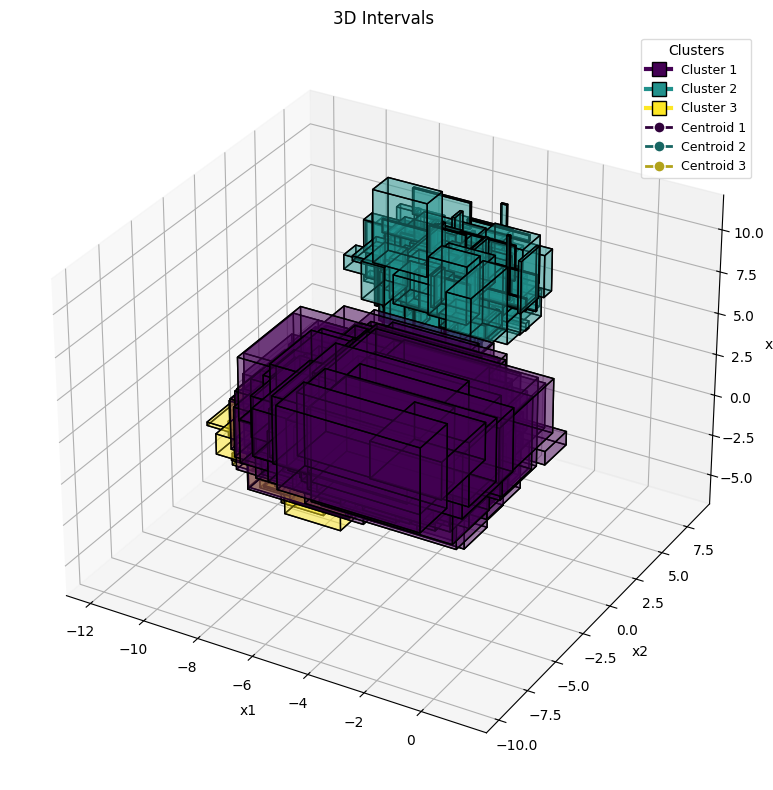

In [6]:
fig, ax = Interval3d.visualize(intervals = random_data.get_intervals(), centroids= hmodel.centroids_, labels = hmodel.labels_)

In [7]:
hmodel.compute_metrics_for_k_range(intervals=random_data.get_intervals())

Computing new linkage matrix...
Computing metrics for k=2...
Computing metrics for k=3...
Computing metrics for k=4...
Computing metrics for k=5...
Computing metrics for k=6...
Computing metrics for k=7...
Computing metrics for k=8...
Computing metrics for k=9...
Computing metrics for k=10...


{'distortion': {2: 38.31846502039518,
  3: 9.692132728502878,
  4: 9.262154091366071,
  5: 8.83829131628799,
  6: 8.528827888870504,
  7: 8.222066545024767,
  8: 7.925650019409086,
  9: 7.646631302649104,
  10: 7.407371550507677},
 'silhouette': {2: 0.593506874397319,
  3: 0.7125872703401601,
  4: 0.5226322475449637,
  5: 0.3421628734756088,
  6: 0.33130849539187485,
  7: 0.108375335190622,
  8: 0.10501110480049533,
  9: 0.10441772349178653,
  10: 0.10264555306753186},
 'calinski_harabasz': {2: 1585.0365139868475,
  3: 4602.4834847711845,
  4: 3222.9556701100837,
  5: 2542.52666579474,
  6: 2112.919504815976,
  7: 1830.796835945552,
  8: 1631.6046396315264,
  9: 1482.7762819270438,
  10: 1362.7758822128458},
 'davies_bouldin': {2: 0.6115815713544827,
  3: 0.4153069741509938,
  4: 1.3116390892458327,
  5: 1.83339979215974,
  6: 1.8573989832931137,
  7: 2.3276344643386815,
  8: 2.2673130030046487,
  9: 2.196810156309904,
  10: 2.1212740331772366},
 'dunn': {2: 0.4618715872393374,
  3: 0.